In [71]:
import cv2
import glob
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt


In [72]:
directory = 'CheckerBoardImage'
prefix    = 'checkerboard'
img_format = 'jpg'

In [73]:
img_path   = Path.cwd()/directory/'{0}_09.{1}'.format(prefix, img_format)

In [74]:
img_path.exists()

True

In [75]:
img = cv2.imread(str(img_path))  

In [76]:
img.shape

(720, 1280, 3)

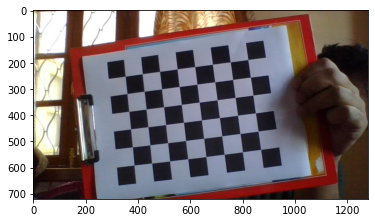

In [77]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [78]:
nx = 8
ny = 6

In [79]:
# Find the chess board corner
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

In [80]:
ret

True

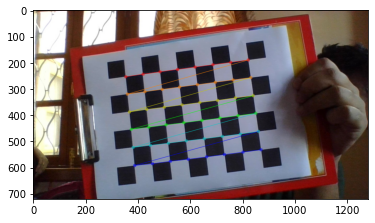

In [81]:
# Plot the detected corners
if ret == True:
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [82]:
# For better precision
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [83]:
corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)


In [84]:
# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = []


In [85]:
objp = np.zeros((1, nx * ny, 3), np.float32)
print(objp.shape)

(1, 48, 3)


In [86]:
objp[0,:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2) * 25

In [87]:
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), 
                                         cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

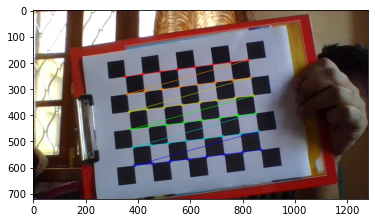

In [88]:
# Plot the detected corners
if ret == True:
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

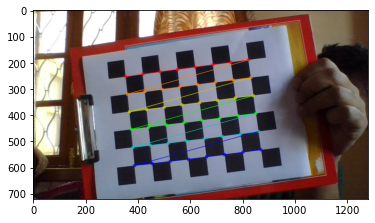

In [89]:
if ret == True:
    objpoints.append(objp)
    
    # refining pixel coordinates for given 2d points.
    corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)   
    imgpoints.append(corners2)
    cv2.drawChessboardCorners(img, (nx, ny), corners2, ret)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


In [90]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [91]:
print('Camera matrix: {}'.format(mtx))

Camera matrix: [[1.19208590e+03 0.00000000e+00 6.17483958e+02]
 [0.00000000e+00 1.20186168e+03 3.98342745e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [92]:
mtx

array([[1.19208590e+03, 0.00000000e+00, 6.17483958e+02],
       [0.00000000e+00, 1.20186168e+03, 3.98342745e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [93]:
tvecs

[array([[-98.34533266],
        [-53.26140743],
        [444.75870092]])]

In [94]:
rvecs

[array([[-0.12002351],
        [ 0.04427755],
        [-0.12492373]])]

In [95]:
dist

array([[ 5.14996390e-01, -2.12943175e+01, -1.11591872e-02,
         1.00520364e-03,  2.04350782e+02]])

In [96]:
def caliberate_camera(dst = None, nx = 8, ny= 6):
    
    # Get the image path
    path = dst.glob('*.jpg')
    path = list(path)
    
    #termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
    object_points = []   # 3D World Coordinates
    image_points  = []   # 2D Image Coordinates
    
    
    objp          = np.zeros((nx*ny, 3), dtype = np.float32)
    objp[:,:2]    = np.mgrid[0:nx,0:ny].T.reshape(-1,2) * 25
    
    for img_path in path:
#         print(img_path)
        img  = cv2.imread(str(img_path))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Find the chess board corners
        ret, corners = cv2.findChessboardCorners(gray, 
                                                 (nx,ny), 
                                                  None
                                                 )
        
        if ret:
            object_points.append(objp)
            
            # Refinet the corners
            corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
            image_points.append(corners2)
    
    # Obtain the camera parameters    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, gray.shape[::-1],None,None)   
    
    return ret, mtx, dist, rvecs, tvecs
    

In [97]:
dst = Path.cwd()/'CheckerBoardImage'

ret, mtx, dist, rvecs, tvecs = caliberate_camera(dst = dst, nx = nx, ny = ny)

In [98]:
ret

1.0445093293425145

In [99]:
mtx

array([[1.02707962e+03, 0.00000000e+00, 6.24253188e+02],
       [0.00000000e+00, 1.02567796e+03, 3.03298869e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [100]:
dist

array([[-0.15559032,  0.62452775, -0.00920531, -0.00354382, -0.97117829]])

In [101]:
rvecs

[array([[-0.64584529],
        [ 0.30776843],
        [ 0.06682948]]),
 array([[-0.17815463],
        [ 0.93394368],
        [ 0.09748431]]),
 array([[-0.21091086],
        [ 0.61527884],
        [ 0.02905561]]),
 array([[-0.18382442],
        [ 0.14353561],
        [-0.01820045]]),
 array([[-0.38138412],
        [-0.45179688],
        [-0.07158888]]),
 array([[-0.84056262],
        [-0.43917357],
        [-0.10441302]]),
 array([[-0.27621347],
        [ 0.13597073],
        [ 0.08999906]]),
 array([[-0.33421343],
        [-0.22247082],
        [-0.01291747]]),
 array([[-0.8030572 ],
        [-0.36165841],
        [ 0.14998446]]),
 array([[-0.86843279],
        [-0.27043515],
        [ 0.16885868]]),
 array([[-0.55770754],
        [-0.34256703],
        [ 0.31292231]]),
 array([[-0.24333003],
        [-0.00366145],
        [ 0.02789897]]),
 array([[-0.28673872],
        [ 0.17826509],
        [ 0.02292133]]),
 array([[-0.30517331],
        [ 0.21601337],
        [ 0.0016174 ]]),
 array

In [102]:
tvecs

[array([[-31.67185276],
        [ 22.81061691],
        [545.95592856]]),
 array([[ 64.37906343],
        [-37.30398394],
        [493.70304864]]),
 array([[  2.77884515],
        [-32.547461  ],
        [482.82237514]]),
 array([[-51.56195593],
        [-19.34886016],
        [362.68973884]]),
 array([[-88.67670345],
        [-17.50947472],
        [400.1680748 ]]),
 array([[-133.29144956],
        [   8.92960215],
        [ 498.72471602]]),
 array([[ 92.41297732],
        [ -1.75373837],
        [873.56753529]]),
 array([[-33.60004884],
        [  4.94659296],
        [684.06983855]]),
 array([[-196.47793321],
        [  25.24724559],
        [ 638.5731067 ]]),
 array([[-205.0476018 ],
        [  73.82470057],
        [ 822.71106251]]),
 array([[-195.14640671],
        [ -69.26790856],
        [ 589.43688368]]),
 array([[-100.72429153],
        [   7.41312149],
        [ 461.59875718]]),
 array([[-85.92362083],
        [ 57.16112876],
        [809.93820784]]),
 array([[ 20.29047969],